# Generate orthogonal arrays with high D-efficiency

This notebook contains example code from the article [Two-level designs to estimate all main effects and two-factor interactions](https://doi.org/10.1080/00401706.2016.1142903) by Eendebak, P. T. and Schoen, E. D.
This example shows how to generate orthogonal arrays with a high $D$-efficiency in a reasonable amount of time (< 1 minute). For more results and details, see the paper.

Generate a D-optimal orthogonal array of strength 2 with 32 runs and 7 factors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import oapackage

In [2]:
run_size = 32
number_of_factors=7
factor_levels=2 
strength=2 
nkeep=24 # Number of designs to generate at each stage

arrayclass=oapackage.arraydata_t(factor_levels, run_size, strength, number_of_factors)
print('In this example we generate orthogonal arrays in the class: %s' % arrayclass)

In this example we generate orthogonal arrays in the class: arrayclass: N 32, k 7, strength 2, s {2,2,2,2,2,2,2}, order 0


First, generate orthogonal arrays with the function `extend_arraylist`. Next, keep the arrays with the best $D$-efficiency.

In [9]:
#%% Create the root array
arraylist=[arrayclass.create_root()]

#%% Extend arrays and filter based on D-efficiency
options=oapackage.OAextend()
options.setAlgorithmAuto(arrayclass)

for extension_column in range(strength+1, number_of_factors-1):    
    print('extend %d arrays with %d columns with a single column' % (len(arraylist), arraylist[0].n_columns) )
    arraylist_extensions = oapackage.extend_arraylist(arraylist, arrayclass, options)

    # Select the best arrays based on the D-efficiency
    dd = np.array([a.Defficiency() for a in arraylist_extensions])
    ind = np.argsort(dd)[::-1]
    ind = ind[0:nkeep]
    selection = [ arraylist_extensions[ii] for ii in ind]
    dd=dd[ind]
    print('  generated %d arrays, selected %d arrays with D-efficiency %.4f to %.4f' % (len(arraylist_extensions), len(ind), dd.min(), dd.max() ) )    
    
    arraylist = selection

extend 1 arrays with 2 columns with a single column
  generated 5 arrays, selected 5 arrays with D-efficiency 0.0000 to 1.0000
extend 5 arrays with 3 columns with a single column
  generated 19 arrays, selected 19 arrays with D-efficiency 0.0000 to 1.0000
extend 19 arrays with 4 columns with a single column
  generated 491 arrays, selected 24 arrays with D-efficiency 0.9183 to 1.0000


Show the best array from the list of D-optimal orthogonal arrays.

In [10]:
print('Generated a design in OA(%d, %d, 2^%d) with D-efficiency %.4f' % (arrayclass.N, arrayclass.strength, arrayclass.ncols, dd[0] ) )
print('The array is (in transposed form):\n')
selection[0].transposed().showarraycompact()

Generated a design in OA(32, 2, 2^7) with D-efficiency 1.0000
The array is (in transposed form):

00000000000000001111111111111111
00000000111111110000000011111111
00001111000011110000111100001111
00110011001100110011001100110011
00111100110000111100001100111100


We calculate the $D$-, $D_s$- and $D_1$-efficiencies.

In [11]:
efficiencies = np.array([array.Defficiencies() for array in arraylist])
efficiencies

array([[1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [0.96181574, 0.88286443, 1.        ],
       [0.96181574, 0.95650928, 1.        ],
       [0.96181574, 0.95650928, 1.        ],
       [0.96181574, 0.88286443, 1.        ],
       [0.9499338 , 0.91920814, 1.        ],
       [0.9499338 , 0.84843523, 1.        ],
       [0.94748859, 0.84146636, 1.        ],
       [0.94748859, 0.91165796, 1.        ],
       [0.94748859, 1.        , 1.        ],
       [0.94748859, 0.84146636, 1.        ],
       [0.93542586, 0.80766262, 1.        ],
       [0.93542586, 0.87503445, 1.        ],
       [0.92726746, 0.85084654, 1.        ],
       [0.92193084, 0.83527574, 1.        ],
       [0.92193084, 0.83527574, 1.        ],
       [0.92193084, 0.83527574, 1.        ],
       [0.91885468, 0.76276343, 1.        ],
       [0.91885468, 0.9078394 , 1.        ],
       [0.91885468, 0.82638995, 1.        ],
       [0.91827841, 0.76123368, 1.        ],
       [0.

Visualize the $D$-efficiencies using a scatter plot.

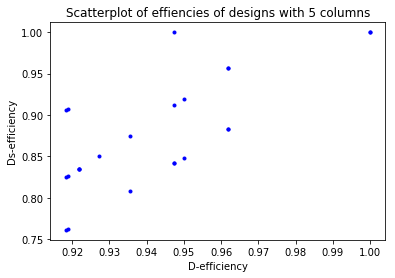

In [12]:
plt.plot(efficiencies[:,0], efficiencies[:,1], '.b')
plt.title('Scatterplot of effiencies of designs with %d columns' % arraylist[0].n_columns)
plt.xlabel('D-efficiency')
_=plt.ylabel('Ds-efficiency')